# Bootstraping 

## What is bootstrapping?

- Bootstrapping is a nonparametric approach where we resample the data vector with resampling. This is with the intent to gain more information about the sample. 

## Benefits of Bootstrapping

- **Fewer assumptions:** Many statistical tests make relatively strict assumptions about data, for example, the requirement of normality. If these are not met, which is more often the case than not, conclusions drawn from the analyses might be incorrect. Bootstrapping makes fewer assumptions and often gives better results.
- **High flexibility:** when there are no analytical formulas available to estimate standard errors for certain statistics, bootstrapping can help out and quantify the uncertainty around a point estimate. Due to its flexibility, bootstrapping computes these estimates for virtually any statistic.

## Strategy for Bootstrapping

- This method is relatively simple and follows this algorithm:

	1. generate a new data vector with the original data vector, where each is generated by resampling with replacement
	2. to calculate the statistic of interest $\theta$ independently and add it to our special bootstrap data vector
	3. to Calculate the statistic of interest $\theta$ of the bootstrap vector 

## Example 

### Mathematical example 

**Original data vector**: $x=[1,2,3,4,5,6,7,8,9,10]$

#### Step 1:

- generate new data vectors with resampling:
  
  - $x_1=[7, 9, 3, 7, 5, 4, 2, 3, 1, 7]$
  - $x_2=[10, 7, 7, 10, 9, 7, 3, 10, 3, 4]$
  - $x_3=[ 2, 9, 10, 1, 3, 5, 8, 10, 3, 5]$
  - $x_2=[ 4, 7, 4, 10, 7, 6, 8, 3, 1, 1]$

#### Step 2:

- Calculate the statistic of interest $\theta$ and add it to the bootstrap vector:
- **note**: $\theta$ can be any statistical parameter that we which to study, like the mean $\overline x$, the standard deviation $\sigma$, or even regression.	
  - $boot=[\overline{x}_1,\overline{x}_2, \overline{x}_3, \overline{x}_4]$ 

#### Step 3:

- calculate the statistic of interest $\theta$ for $boot$:
	
  - $\overline {boot}$ 


## Programming example

- The true power of bootstrapping is obtained from doing this algorithm multiple times. With the advances of technology, the ability to do multiple replications have become extremely accessible. To show this, will see a programming example for bootstrapping. 
- For this example, we will generate a dataset that has a poison distribution so that we could see one of the advantages of bootstrapping, where you will see how you can fix this distribution so that you could satisfy the condition of normal distribution. 

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

(array([0.028   , 0.084875, 0.1365  , 0.149625, 0.14    , 0.12075 ,
        0.08575 , 0.098875, 0.018375, 0.006125, 0.0035  , 0.00175 ,
        0.      , 0.000875]),
 array([ 0.        ,  1.14285714,  2.28571429,  3.42857143,  4.57142857,
         5.71428571,  6.85714286,  8.        ,  9.14285714, 10.28571429,
        11.42857143, 12.57142857, 13.71428571, 14.85714286, 16.        ]),
 <BarContainer object of 14 artists>)

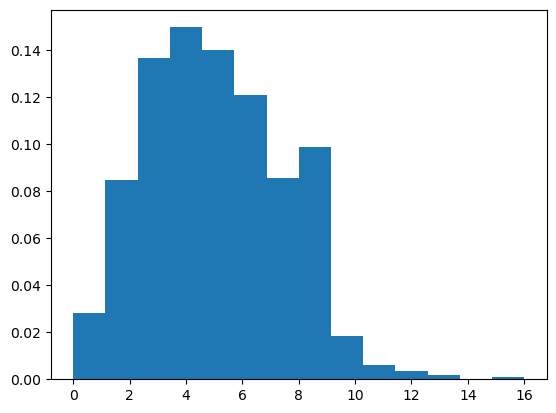

In [3]:
# Generate Synthetic Data
poisson = np.random.poisson(5, 1000)
plt.hist(poisson, 14, density=True)


(array([  2.,   0.,   3.,   2.,  16.,  22.,  37.,  71., 104., 147., 247.,
        257., 373., 442., 466., 511., 514., 439., 398., 297., 198., 147.,
        138.,  71.,  55.,  23.,  10.,   6.,   2.,   2.]),
 array([4.731     , 4.74866667, 4.76633333, 4.784     , 4.80166667,
        4.81933333, 4.837     , 4.85466667, 4.87233333, 4.89      ,
        4.90766667, 4.92533333, 4.943     , 4.96066667, 4.97833333,
        4.996     , 5.01366667, 5.03133333, 5.049     , 5.06666667,
        5.08433333, 5.102     , 5.11966667, 5.13733333, 5.155     ,
        5.17266667, 5.19033333, 5.208     , 5.22566667, 5.24333333,
        5.261     ]),
 <BarContainer object of 30 artists>)

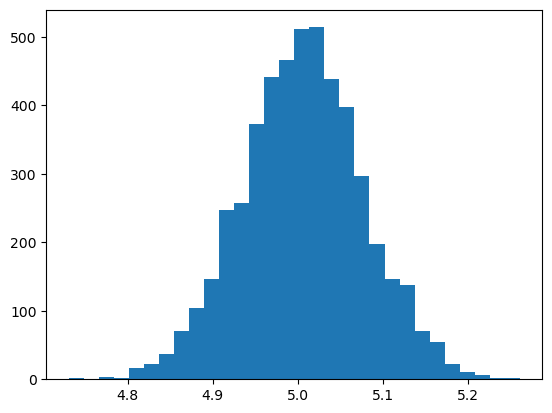

In [4]:
boot = np.array([])
i = 0
while i < 5000:
    x = np.random.choice(poisson, size=len(poisson), replace=True)
    boot = np.append(boot, np.mean(x))
    i += 1
plt.hist(boot, bins=30)

Utilizing the Shapiro Wilk test can formula test whether the data follows a normal distribution. The null for this hypothesis is that it follows a normal distribution and the alternative being that it does not follow a normal distribution. 

In [5]:
print('original data: ' + str(stats.shapiro(poisson)))
print('bootstrap data: ' + str(stats.shapiro(boot)))

original data: ShapiroResult(statistic=0.9624232649803162, pvalue=2.271437220916785e-15)
bootstrap data: ShapiroResult(statistic=0.9995839595794678, pvalue=0.37668389081954956)


This result shows the benefit of bootstrapping to mitigate problems of our data not following a normal distribution.

### Confidence intervals 

- For the confidence interval approach, we will generate the $CI^{95}$ by utilizing the standard errors and generate a $CI^{95}$ as we would normally do, but with the difference that instead of utilizing the sample, we will use the bootstrap sample. 
- For this next example, suppose we are researchers for a regulatory board. We are tasked in determining if a university, the status of a university. A university is considered "elite" if they have a mean of 45 for their test scores. We are given a random sample of the students test scores for a given university.
$$students=[19, 29, 29, 30, 34, 36, 39, 47, 51, 52, 53, 60, 60, 64, 66, 68, 70]$$ 
- Our hypothesis test will go as follows:
	- $\mu=\mu_{0}$
	- $\mu≠\mu_0$
- where:
	- $\mu$: is the testing parameter (which in this case is a mean of 45)
	- $\mu_{0}$: is the bootstrap sample mean

In [37]:
# generate new dataset
students = np.array([19,29,29,30,34,36,39,47,51,52,53,60,60,64,66,68,70])
z_score = 1.96
# bootstrap
bootst = np.array([])
i = 0
while i < 20000:
    x_boot = np.random.choice(students, size=17, replace=True)
    bootst = np.append(bootst, np.mean(x_boot))
    i += 1

# Confidence interval
mean = np.mean(bootst)
std = np.std(bootst)
ci = [mean - z_score*std, mean + z_score*std]
print('Bootstrap confidence interval: ' + str(ci))

# confidence interval for strudents
mean_students = np.mean(students)
std_students = np.std(students)
ci_students = [mean_students - z_score*std_students, mean_students + z_score*std_students]
print('Original data confidence interval: ' + str(ci_students))

Bootstrap confidence interval: [40.05199052276214, 54.788533006649615]
Original data confidence interval: [17.008931038589434, 77.9322454319988]
Ttest_1sampResult(statistic=91.04517743492856, pvalue=0.0)


- Given that the 45 is in the null hypothesis, we cannot reject the null hypothesis 
- the interesting part about this example is that with the same data we have made our confidence interval more accurate compared with the confidence interval of the original sample. 

### sampling in accordance with the null

The second main approach to using bootstrapping to test hypotheses is to generate a sampling procedure that is in accordance with the null hypothesis. For this method, we will get the distance from the sample mean with hypothesise mean. We will use this to generate an upper and lower bound by adding and substracting the hypothesise mean. By dividing the number of times the bootstrap samples fall outside this bound by the number of bootstrap repetitions, we will generate our p-value. We could express this the following way:
$$P_{Boot}=\frac{D_1+D_2}{B}$$
where: 
  - $D_1$: is the number of times the mean falls below the bound $D_1<\mu - |(\mu_s-_\mu)|$
  - $D_2$: is the number of times the mean falls above the bound $D_1>\mu + |(\mu_s-_\mu)|$
  - $B$: the amount of repetition for the bootstrap sample

In [39]:
# sampling in accordance with the null
distance = np.mean(students) - 45
d1 = 0
d2 = 0
bound =[45 - distance, 45 + distance]
for i in bootst:
    if i < bound[0]:
        d1 += 1
    if i > bound[1]:
        d2 += 1
    else:
        continue
pboot = (d1 + d2) / len(bootst)
print(pboot)

0.5933


- From these results we see that we cannot reject the null since the $P_{Boot}$ is grater than 0.05 
- Finally, the question arises which method of bootstrapping to use for hypothesis testing: confidence intervals or sampling in accordance with the null. Generally speaking, sampling with the null is not always possible, as constructing the correct sampling distribution can be difficult. Additionally, this method makes use of some tricks, like shifting values, which also creates certain problems. Consequently, the CI method is often preferred, although this rule is not written in stone.

## Conclusion 

As we have seen in this presentation, bootstrapping is a resampling method that allow to gain more insight about our data and helps with problems with normal distribution.  